Fernando Ugucioni Filho. 11802735.


In [1]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np

#Criar uma variável global apra representar o tempo
global T
T = 0

# definir o tamanho do vetor tempo
sT = 201
#vetor tempo
T_Int = np.linspace(0, 2, sT)
#print(T_Int)

In [2]:
# Cálculo de restrições dados X e T
def constrEq4bar(X):
    x1 = X[0]
    y1 = X[1]
    phi1 = X[2]
    x2 = X[3]
    y2 = X[4]
    phi2 = X[5]
    x3 = X[6]
    y3 = X[7]
    phi3 = X[8]
    F = np.array([-x1+40*np.cos(phi1),
              -y1+40*np.sin(phi1),
              x1+40*np.cos(phi1)-x2+130*np.cos(phi2),
              y1+40*np.sin(phi1)-y2+130*np.sin(phi2),
              x2+130*np.cos(phi2)-x3+90*np.cos(phi3),
              y2+130*np.sin(phi2)-y3+90*np.sin(phi3),
              x3+90*np.cos(phi3)-180,
              y3+90*np.sin(phi3),
              phi1-2*np.pi*T-np.pi/2])   
    return F

# Cálculo da Matrix Jacobiana e Gamma dados phi1, phi2 3 phi3
def Jaco4bar(phi1, phi2, phi3):
    JacoMatrix = np.array([[-1, 0, -40*np.sin(phi1), 0, 0, 0, 0, 0, 0],
                           [0, -1, 40*np.cos(phi1), 0, 0, 0, 0, 0, 0],
                           [1, 0, -40*np.sin(phi1), -1, 0, -130*np.sin(phi2), 0, 0, 0],
                           [0, 1, 40*np.cos(phi1), 0, -1, 130*np.cos(phi2), 0, 0, 0],
                           [0, 0, 0, 1, 0, -130*np.sin(phi2), -1, 0, -90*np.sin(phi3)],
                           [0, 0, 0, 0, 1, 130*np.cos(phi2), 0, -1, 90*np.cos(phi3)],
                           [0, 0, 0, 0, 0, 0, 1, 0, -90*np.sin(phi3)],
                           [0, 0, 0, 0, 0, 0, 0, 1, 90*np.cos(phi3)],
                           [0, 0, 1, 0, 0, 0, 0, 0, 0]])      
    return JacoMatrix

# cálculo da Gamma
def Gamma4bar (phi1, phi2, phi3, dphi1, dphi2, dphi3):
    Gamma  = np.array([40*np.cos(phi1)*dphi1**2,
                       40*np.sin(phi1)*dphi1**2,
                       40*np.cos(phi1)*dphi1**2+130*np.cos(phi2)*dphi2**2,
                       40*np.sin(phi1)*dphi1**2+130*np.sin(phi2)*dphi2**2,
                       130*np.cos(phi2)*dphi2**2+90*np.cos(phi3)*dphi3**2,
                       130*np.sin(phi2)*dphi2**2+90*np.sin(phi3)*dphi3**2,
                       90*np.cos(phi3)*dphi3**2,
                       90*np.sin(phi3)*dphi3**2,
                       0])
    return Gamma

In [3]:
#condições iniciais
X0 = np.array([0, 40, np.pi/2, 125.86, 132.55, 0.2531, 215.86, 82.55, 4.3026])
#print(X0)
 
 # Determinar as posições, as velocidades e as acelerações que variam no tempo
Xinit = X0

X = np.zeros((9, sT))
V = np.zeros((9, sT))
A = np.zeros((9, sT))
RJ= np.zeros((1, sT))
DJ= np.zeros((1, sT))
CJ= np.zeros((1, sT))

for Iter in range(0, sT):
    T = T_Int[Iter]
    # posição
    Xtemp = fsolve(constrEq4bar, Xinit)
    Xinit = Xtemp
    X[:,Iter] = Xtemp # X recebe as posições do mecanismo no tempo
    # velocidade
    phi1 = Xtemp[2]
    phi2 = Xtemp[5]
    phi3 = Xtemp[8]
    JacoMatrix=Jaco4bar(phi1,phi2,phi3)
    RJ[:,Iter]=np.linalg.matrix_rank(JacoMatrix)
    DJ[:,Iter]=np.linalg.det(JacoMatrix)
    CJ[:,Iter]=np.linalg.cond(JacoMatrix)
    # inversão da matrix Jacobiana
    y = np.linalg.inv(JacoMatrix) 
    # multiplicação com Beta
    Beta = np.array([0, 0, 0, 0, 0, 0, 0, 0, 2*np.pi])
    Vtemp = np.matmul(y,Beta)
    V[:,Iter] = Vtemp 
    #acelaração
    dphi1 = Vtemp[2]
    dphi2 = Vtemp[5]
    dphi3 = Vtemp[8]
    Gamma = Gamma4bar(phi1,phi2,phi3,dphi1,dphi2,dphi3)  
    Atemp = np.matmul(y,Gamma)
    A[:,Iter] = Atemp

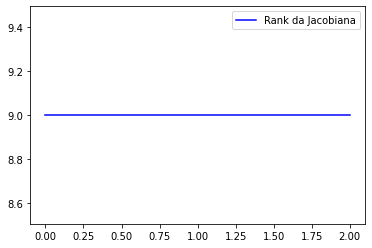

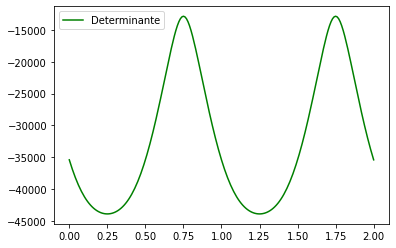

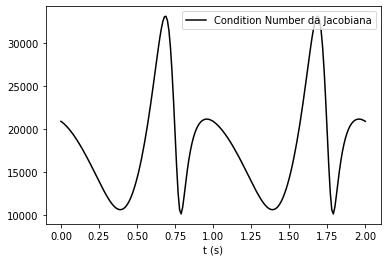

In [5]:
# Gráficos da Velocidade
plt.figure()    
plt.plot(T_Int, RJ[0,:], 'b', label='Rank da Jacobiana')
plt.legend(loc="best")
plt.figure()
plt.plot(T_Int, DJ[0,:], 'g', label='Determinante')
plt.legend(loc="best")
plt.figure()
plt.plot(T_Int, CJ[0,:], 'k', label='Condition Number da Jacobiana')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.show()